# Technical Report  
Darrell Cenido and Jon Larson  
CPSC 322, Fall 2025

## Introduction
The dataset we are using is a [Spotify track dataset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-600k-tracks) from Kaggle that contains attributes such as popularity (classification label), danceability, duration_ms, artists, explicit, energy, release_date, tempo, loudness, etc.  

We used the attributes danceability, duration_ms, explicit, energy, release_date (for cleaning), tempo, and loudness to help classify the popularity of a track. Though we will go more in depth later in this notebook, we found that our Naive Bayes classifier performed the best when it came to determining this attribute.

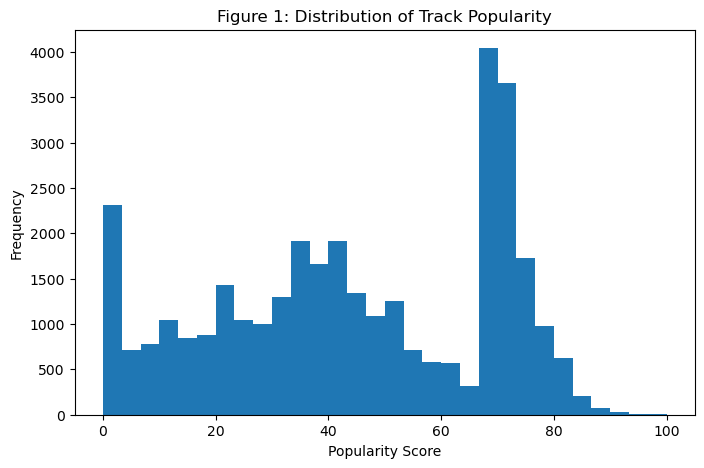

In [1]:
from mysklearn.mypytable import MyPyTable
import matplotlib.pyplot as plt

table = MyPyTable().load_from_file("cleaned_tracks.csv")

popularity = table.get_column("popularity")
energy = table.get_column("energy")
danceability = table.get_column("danceability")
duration_ms = table.get_column("duration_ms")

plt.figure(figsize=(8,5))
plt.hist(popularity, bins=30)
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.title("Figure 1: Distribution of Track Popularity")
plt.show()


`Figure 1` above shows the distribution of track popularity before categorization into the class labels of 'Low', 'Medium', and 'High'.

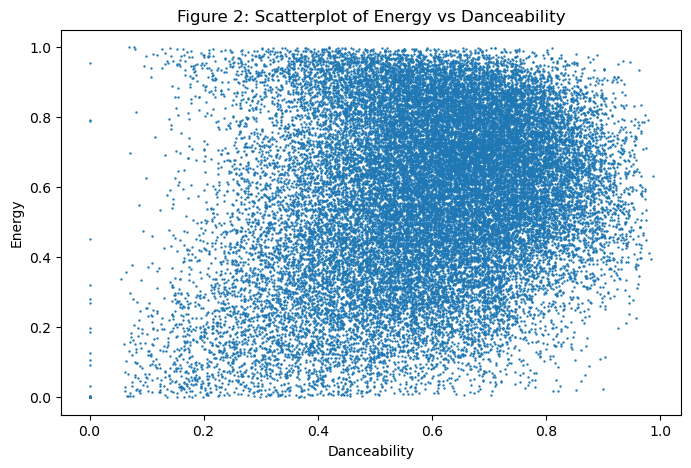

In [2]:
plt.figure(figsize=(8,5))
plt.scatter(danceability, energy, s=.5)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Figure 2: Scatterplot of Energy vs Danceability")
plt.show()

`Figure 2` above compares energy and danceability in a scatterplot, showing a positive  
relationship between the two features, suggesting energetic songs also tend to be more danceable.

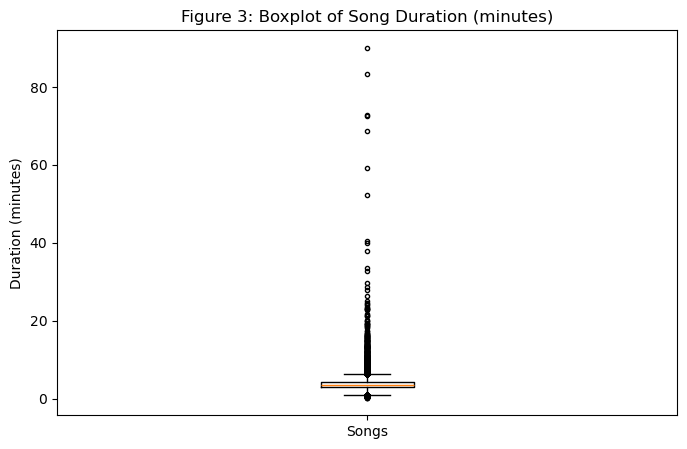

In [3]:
# Convert ms → minutes
duration_min = [d / 60000 for d in duration_ms]

plt.figure(figsize=(8,5))
plt.boxplot(duration_min, flierprops=dict(marker='o', markersize=3))

plt.ylabel("Duration (minutes)")
plt.xticks([1], ["Songs"])
plt.title("Figure 3: Boxplot of Song Duration (minutes)")

plt.ticklabel_format(style="plain", axis="y")  # keeps clean numeric labels
plt.show()

`Figure 3` above presents a boxplot of duration_ms, highlighting extreme outliers that may need filtering before training models.

## Data Analysis

The Spotify dataset contains approximately 600,000 tracks, including attributes such as danceability, energy, duration_ms, explicit (boolean), release_date, and popularity (our classification label). The attributes include numeric features (e.g., danceability, duration_ms, energy), categorical features (e.g., explicit), string fields (e.g., artists), and date fields (release_date). For classification, we focus primarily on the numeric musical features because they are most consistently available across instances.

Our target variable is popularity, an integer from 0 to 100. Because popularity is a continuous score, we convert it into categories representing low (0-33), medium (34-66), and high (67-100) popularity. This makes popularity suitable for classification models.

To better understand the dataset, we computed basic summary statistics. The numeric attributes, such as danceability and energy, follow roughly bell-shaped distributions centered around mid-range values. Duration_ms, however, is strongly right-skewed due to extremely long tracks, which suggests the need for normalization or outlier handling. Explicit content also shows an imbalance, with the majority of tracks being non-explicit.

We visualized several key attributes to gain insight into the dataset. These are shown and described throughout the figures in this notebook.

These analyses helped identify useful features for classification and highlighted necessary preprocessing steps such as scaling and removing outliers. Overall, the dataset appears clean and suitable for building classification models to predict track popularity.

## Classification Results

#### Dummy
We used a dummy classifier as a baseline for out classification, this classifier was able to achieve an accuracy of around 32% which makes sense due to the class distribution after cleaning being around 1/3 of the data. 

10-fold cross-validation was used to achieve this baseline and the confusion matrix created for this classifier showed us that over these ten predictions each class was predicted with an accuracy around 30%. This tracks due to the classifier predicting the most common label for every instance.

Overall, these baseline results allow us to properly determine if our other models are improving upon classification.

#### Naive Bayes
We applied a Naive Bayes classifier to predict track popularity, using numeric musical features including explicit, duration_ms, danceability, energy, tempo, and loudness. Popularity, originally a continuous score from 0 to 100, was divided into three categories for classification: Low (0–33), Medium (34–66), and High (67–100).

Using 10-fold cross-validation, the classifier achieved an overall accuracy of 51% and an error rate of 49%. While the classifier performs reasonably well for 'Low' and 'Medium' popularity tracks, it struggles to correctly predict 'High' popularity tracks due to their relative rarity in the dataset.

The confusion matrix showed us the performance of the classifier. We saw that 'Low' class predictions had a 72% accuracy and 'High' class predictions had a 74% accuracy and the 'Medium' class predictions had an accuracy of only 8%.

#### Decision Tree
To get an accurate estimate of performance, we used 10-fold cross-validation. The average performance across all folds was 39% accuracy and 61% error rate. Decision trees tend to overfit, especially with noisy or imbalanced datasets and this likely contributed to the performance.

The majority of predictions fell into the 'Low' popularity class, even when the true label was 'Medium' or 'High'. This occurs because a decision tree tends to follow majority class patterns unless it is normalized. Since musical features vary gradually, the boundaries between classes are unclear so the tree struggled to make crisp decision splits. 

It seemed that 'Medium' was the hardest popularity to predict as only 1400 were correctly classified out of 11367 'Medium' class instances. This supports that decision splits were not crisp. Another thing that stood out was that our 'Low' classification was quite accurate predicting 80% of instances accurately which was better than our Naive Bayes classifier with a 72% accuracy. 

Our decision tree was better at 'Low' class predictions and Naive Bayes was better at 'High' class predictions.

#### Random Forest

The final classifier we used for this project was a Random Forest. This classifier performed a stratified train test split on the cleaned dataset creating a test set consisting of one third of the original data and a training set with the other two thirds of the data. Due to our data set being quite large and having a limit to our computing power we decided in the interest of time we would evaluate a random forest with values of N = 5, M = 3, and randomly selecting F based upon the remaining attributes within the creation of one of the trees. 

The predictions themselves were simple majority voting based on the 3 selected 'best' trees. Based upon these factors our random forest was able to achieve an accuracy of 39%. Looking at each individual instance classification gives us a better idea of how the decision trees within the forest came to the predictions that they did. For instance, 'Low' was predicted with an accuracy of 73%, 'Medium' was much lower at 17%, and 'High' was predicted correctly 27% of the time. These values tell us that the random forest had a difficult time with the 'Medium' popularity instances. Comparing this to our Decision Tree classifier, which had predicted 'Low' with an accuracy of 80%, 'Medium' with an accuracy of 12%, and 'High' with an accuracy of 24%, our Random Forest was able to increase the weaker predictions of the 'Medium' and 'High' classes but lost some accuracy when predicting the 'Low' class.

Overall, our Random Forest classifier performed very similarly to our decision tree classifier and as mentioned above decision trees tend to overfit so our classification accuracy results being much higher for 'Low' could result from this.

### Best Classifier

In the end, our classifiers all had similar strengths and weaknesses within this dataset. In our opinion, the best classifier for this dataset was the Naive Bayes classifier due to the fact that it was able to predict both the 'Low' and 'High' class with over 70% accuracy. However, for some reason the Naive Bayes classifier really struggled with classifying the 'Middle' class with only an accuracy of 8%. Despite this, we believe that the Naive Bayes classifier was the best classifier for this dataset and that is also reflected through its high overall accuracy of 51%.


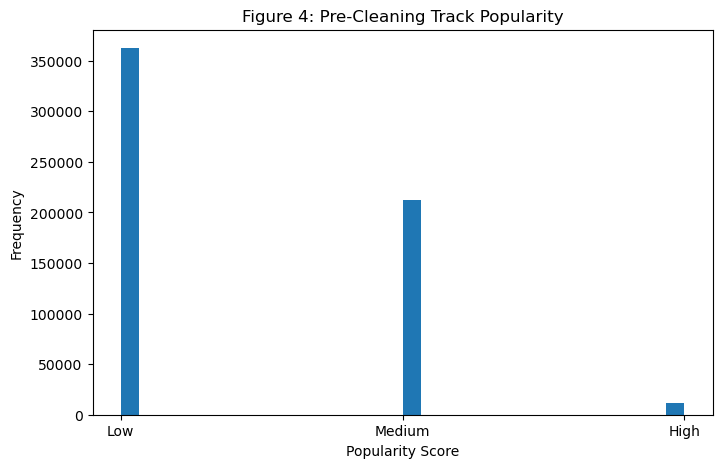

In [4]:
table = MyPyTable().load_from_file("input_data/tracks.csv")

def categorize_popularity(p):
    p = int(p)
    if p <= 33:
        return "Low"
    elif p <= 66:
        return "Medium"
    else:
        return "High"

pop_idx = table.column_names.index("popularity")
y = [categorize_popularity(row[pop_idx]) for row in table.data]

plt.figure(figsize=(8,5))
plt.hist(y, bins=30)
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.title("Figure 4: Pre-Cleaning Track Popularity")
plt.show()

`Figure 4` above shows the distribution of track popularity before cleaning and it illustrates that  
popularity scores are heavily concentrated towards the 'low' class label, with relatively few highly popular tracks.

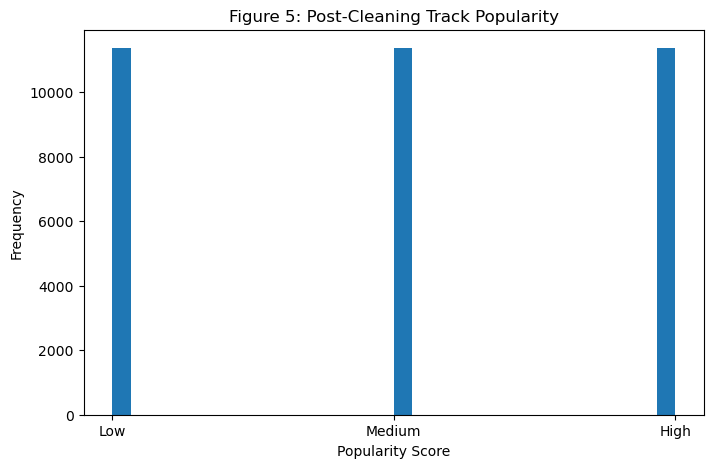

In [5]:
table = MyPyTable().load_from_file("cleaned_tracks.csv")

pop_idx = table.column_names.index("popularity")
y = [categorize_popularity(row[pop_idx]) for row in table.data]

plt.figure(figsize=(8,5))
plt.hist(y, bins=30)
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.title("Figure 5: Post-Cleaning Track Popularity")
plt.show()

`Figure 5` above shows the distribution of track popularity after cleaning and it illustrates that the class  
labels are now balanced and ready for classification.

## Conclusion

In this project, we worked with a music dataset to predict song popularity, categorized into Low (0–33), Medium (34–66), and High (67–100). One of the main challenges with this dataset was its severe class imbalance, with the majority of songs falling into the Low-popularity category. To address this, we cleaned and balanced the dataset by downsampling each class to match the size of the smallest class (High), resulting in 11,367 instances per class and 34,101 total instances. This gave each classifier a fair chance to learn from all three categories.

After cleaning the data, we implemented four classification approaches, Dummy, Naive Bayes, Decision Tree, and a Random Forest. Based on the results, each classifier showed different strengths. The Decision Tree and Random Forest performed better at predicting the 'Low' class, while Naive Bayes performed well on both the 'High' and 'Low' class labels and the Dummy performed poorly on all class labels. However, an interesting fact was that each classifier other than the dummy did not do a good job of classifying a 'Medium' popularity track. Overall, performance remained modest with the Naive Bayes achieving an accuracy of 51%, the Decision Tree achieving a 39% accuracy, the Random Forest achieving an accuracy of 39%, and the baseline Dummy accuracy being 32%.

There are several possible we have though could be used to improve performance. One improvement for Naive Bayes could be reducing or modifying features that contribute less to classification. Some others could be eliminating the drastic outliers in the training data as shown in `Figure 3`. Despite the challenges of the dataset, this project gave us valuable insight into the strengths and limitations of different classifiers when applied to real-world, imperfect data.

## Acknowledgments

* Spotify Track Dataset (Kaggle): Spotify Dataset 1921–2020, 600k+ Tracks